In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer

In [4]:
df = pd.read_csv('Datasets/titanic_train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [5]:
df.dropna(inplace=True)

In [6]:
df.shape

(714, 3)

In [7]:
X = df[['Age','Fare']]
y = df['Survived']

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
clf = DecisionTreeClassifier()

In [11]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy Before Binning',accuracy_score(y_test,y_pred))

Accuracy Before Binning 0.6223776223776224


In [12]:
np.mean(cross_val_score(clf,X,y,scoring='accuracy'))

0.6162612035851472

In [14]:
Kbin_age = KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
Kbin_fare= KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')

In [16]:
trf = ColumnTransformer(
[
    ('first',Kbin_age,[0]),
    ('second',Kbin_fare,[1])
]
)

In [17]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [18]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [19]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [20]:
trf.named_transformers_['second'].bin_edges_

array([array([  0.    ,   7.75  ,   7.8958,   9.225 ,  13.    ,  15.75  ,
               26.    ,  29.125 ,  51.4792,  82.1708, 512.3292])         ],
      dtype=object)

In [23]:
output = pd.DataFrame(
    {
         'age':X_train['Age'],
         'age_trf':X_train_trf[:,0],
         'fare':X_train['Fare'],
         'fare_trf':X_train_trf[:,1]
    }
)

In [24]:
output.head()

,age,age_trf,fare,fare_trf
328,31.0,5.0,20.5250,5.0
73,26.0,4.0,14.4542,4.0
253,30.0,5.0,16.1000,5.0
719,33.0,6.0,7.7750,1.0
666,25.0,4.0,13.0000,4.0


In [26]:
output['age_labels']=pd.cut(x=X_train['Age'],bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=X_train['Fare'],bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [27]:
output

,age,age_trf,fare,fare_trf,age_labels,fare_labels
328,31.0,5.0,20.5250,5.0,"(28.5, 32.0]","(15.75, 26.0]"
73,26.0,4.0,14.4542,4.0,"(25.0, 28.5]","(13.0, 15.75]"
253,30.0,5.0,16.1000,5.0,"(28.5, 32.0]","(15.75, 26.0]"
719,33.0,6.0,7.7750,1.0,"(32.0, 36.0]","(7.75, 7.896]"
666,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"
...,...,...,...,...,...,...
92,46.0,8.0,61.1750,8.0,"(42.0, 50.0]","(51.479, 82.171]"
134,25.0,4.0,13.0000,4.0,"(22.0, 25.0]","(9.225, 13.0]"
337,41.0,7.0,134.5000,9.0,"(36.0, 42.0]","(82.171, 512.329]"
548,33.0,6.0,20.5250,5.0,"(32.0, 36.0]","(15.75, 26.0]"


In [29]:
clf2 = DecisionTreeClassifier()

In [32]:
clf2.fit(X_train_trf,y_train)

DecisionTreeClassifier()

In [33]:
y_p = clf2.predict(X_test_trf)
accuracy_score(y_test,y_p)

0.6223776223776224

In [40]:
def discretize(bins,strategy):
    Kbin_age=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    Kbin_fare=KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',Kbin_age,[0]),
        ('second',Kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title('After')
    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title('Before')
    
    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title('After')
    plt.show()

0.6204570077809516


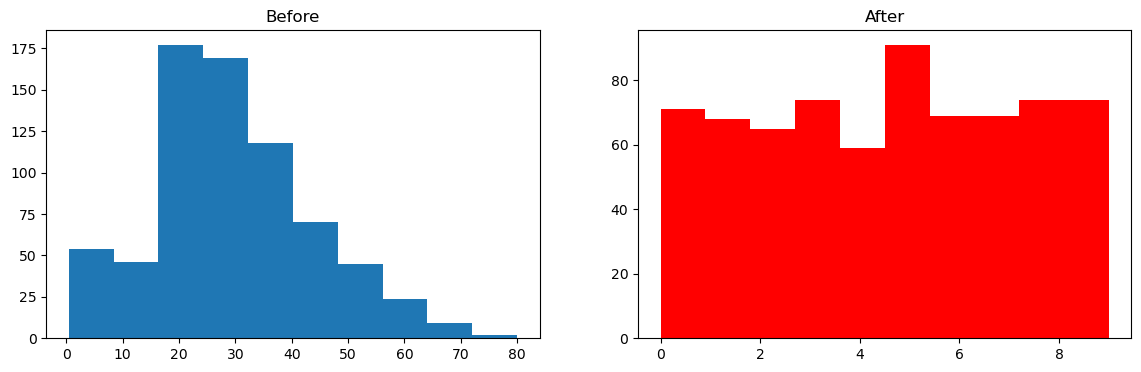

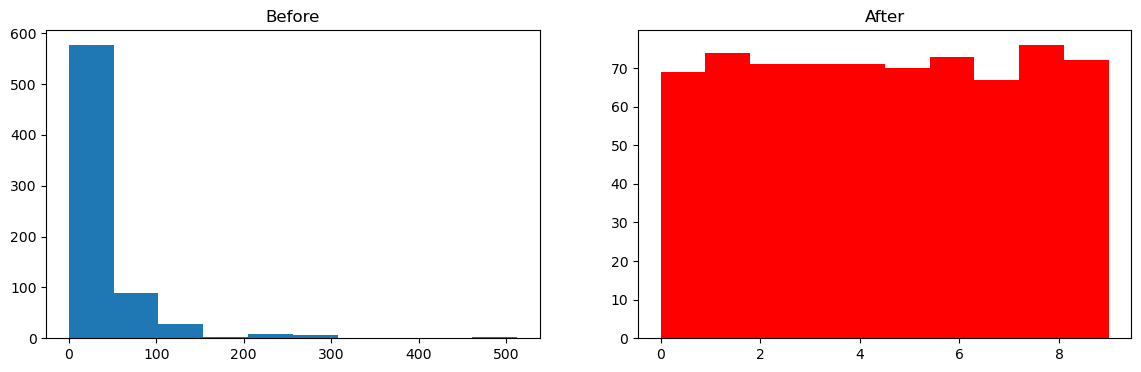

In [41]:
discretize(10,'quantile')